## Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
## load dataset
df = pd.read_pickle("../dataFrames/testDF.pkl")

# Get the numerical data only
background_array = df[df['isSignal'] == 0].to_numpy()[:,3:].astype(float)
signal_array = df[df['isSignal'] == 1].to_numpy()[:,3:].astype(float)

In [3]:
df[df['isSignal'] == 0].describe()

,evtIdx,isSignal,mjj,dEtajj,dPhijj,dRjj,dPtjj,sumPtAllJets,sumPtjj,vecSumPtAllJets,vecSumPtjj
count,18258.000000,18258.0,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000
mean,10013.995399,0.0,3155.416702,0.913135,3.136305,3.321159,131.932892,2890.415395,2694.300198,76.492025,187.332879
std,5776.013576,0.0,691.470681,0.636538,0.142008,0.255836,134.793822,450.798363,409.457578,58.019209,180.269486
min,0.000000,0.0,1710.816124,0.000509,0.679423,2.070526,0.013219,1909.409734,1705.857127,0.475891,1.202254
25%,5012.500000,0.0,2659.457444,0.392157,3.101867,3.161718,43.469238,2569.909825,2423.238087,36.704566,70.492285
50%,10001.000000,0.0,2988.148242,0.809991,3.140124,3.259394,92.478624,2776.727023,2582.713091,63.661037,128.274831
75%,15025.750000,0.0,3463.345502,1.335945,3.177682,3.439689,169.737189,3087.712439,2848.656529,101.988916,233.056233
max,19999.000000,0.0,7894.873533,3.672098,4.143140,4.914532,1155.327594,6203.862270,6083.312612,1232.897423,2211.935812


In [4]:
df[df['isSignal'] == 1].describe()

,evtIdx,isSignal,mjj,dEtajj,dPhijj,dRjj,dPtjj,sumPtAllJets,sumPtjj,vecSumPtAllJets,vecSumPtjj
count,1742.000000,1742.0,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000
mean,9847.572905,1.0,3473.017554,0.721135,3.140350,3.255766,103.564302,3247.096896,3128.598182,82.412197,148.848943
std,5748.236483,0.0,237.051598,0.483405,0.105467,0.162784,106.313277,369.718586,339.196274,70.736072,157.062204
min,4.000000,1.0,1703.779425,0.002297,1.910601,2.103026,0.035640,2307.555400,1783.909439,0.844536,2.782309
25%,4908.750000,1.0,3390.462245,0.319928,3.117663,3.155696,34.308215,3011.790915,2903.349481,35.338071,55.695941
50%,9958.000000,1.0,3492.605924,0.638602,3.140931,3.216508,73.761939,3285.214853,3199.169433,64.110328,105.881484
75%,14717.000000,1.0,3587.290606,1.064596,3.163793,3.339386,133.603154,3469.324034,3377.686239,109.687578,176.634040
max,19997.000000,1.0,4683.687923,2.152715,3.853149,4.010953,910.220073,5434.477183,4466.923721,657.154495,1432.573718


Plot the variables one by one...

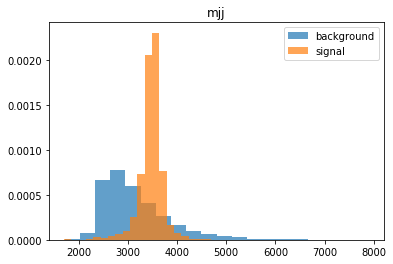

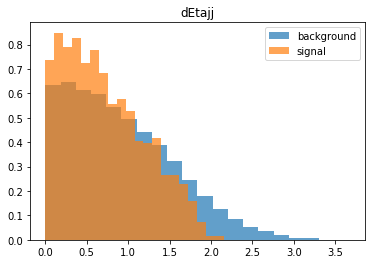

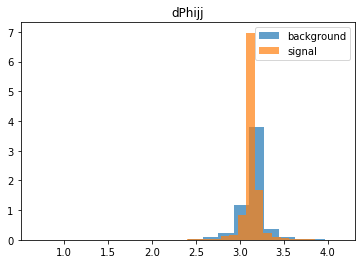

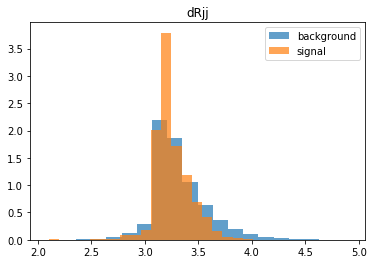

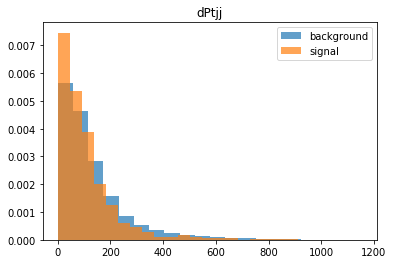

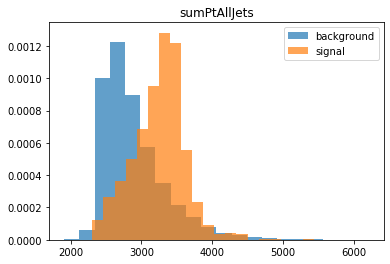

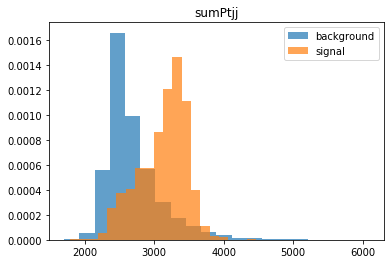

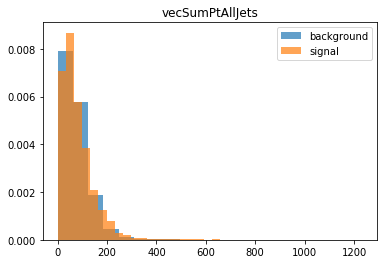

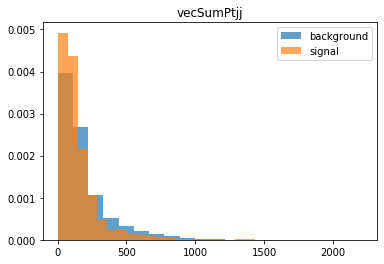

In [15]:
for param in range(background_array.shape[1]):
    plt.hist(background_array[:, param], label='background', alpha=0.7, density=True, bins=20)
    plt.hist(signal_array[:, param], label='signal', alpha=0.7, density=True, bins=20)
    plt.legend(loc='upper right')
    plt.title(f"{df.columns[param+3]}")
    plt.show()
    print()

Now let's plot all variables against each other.

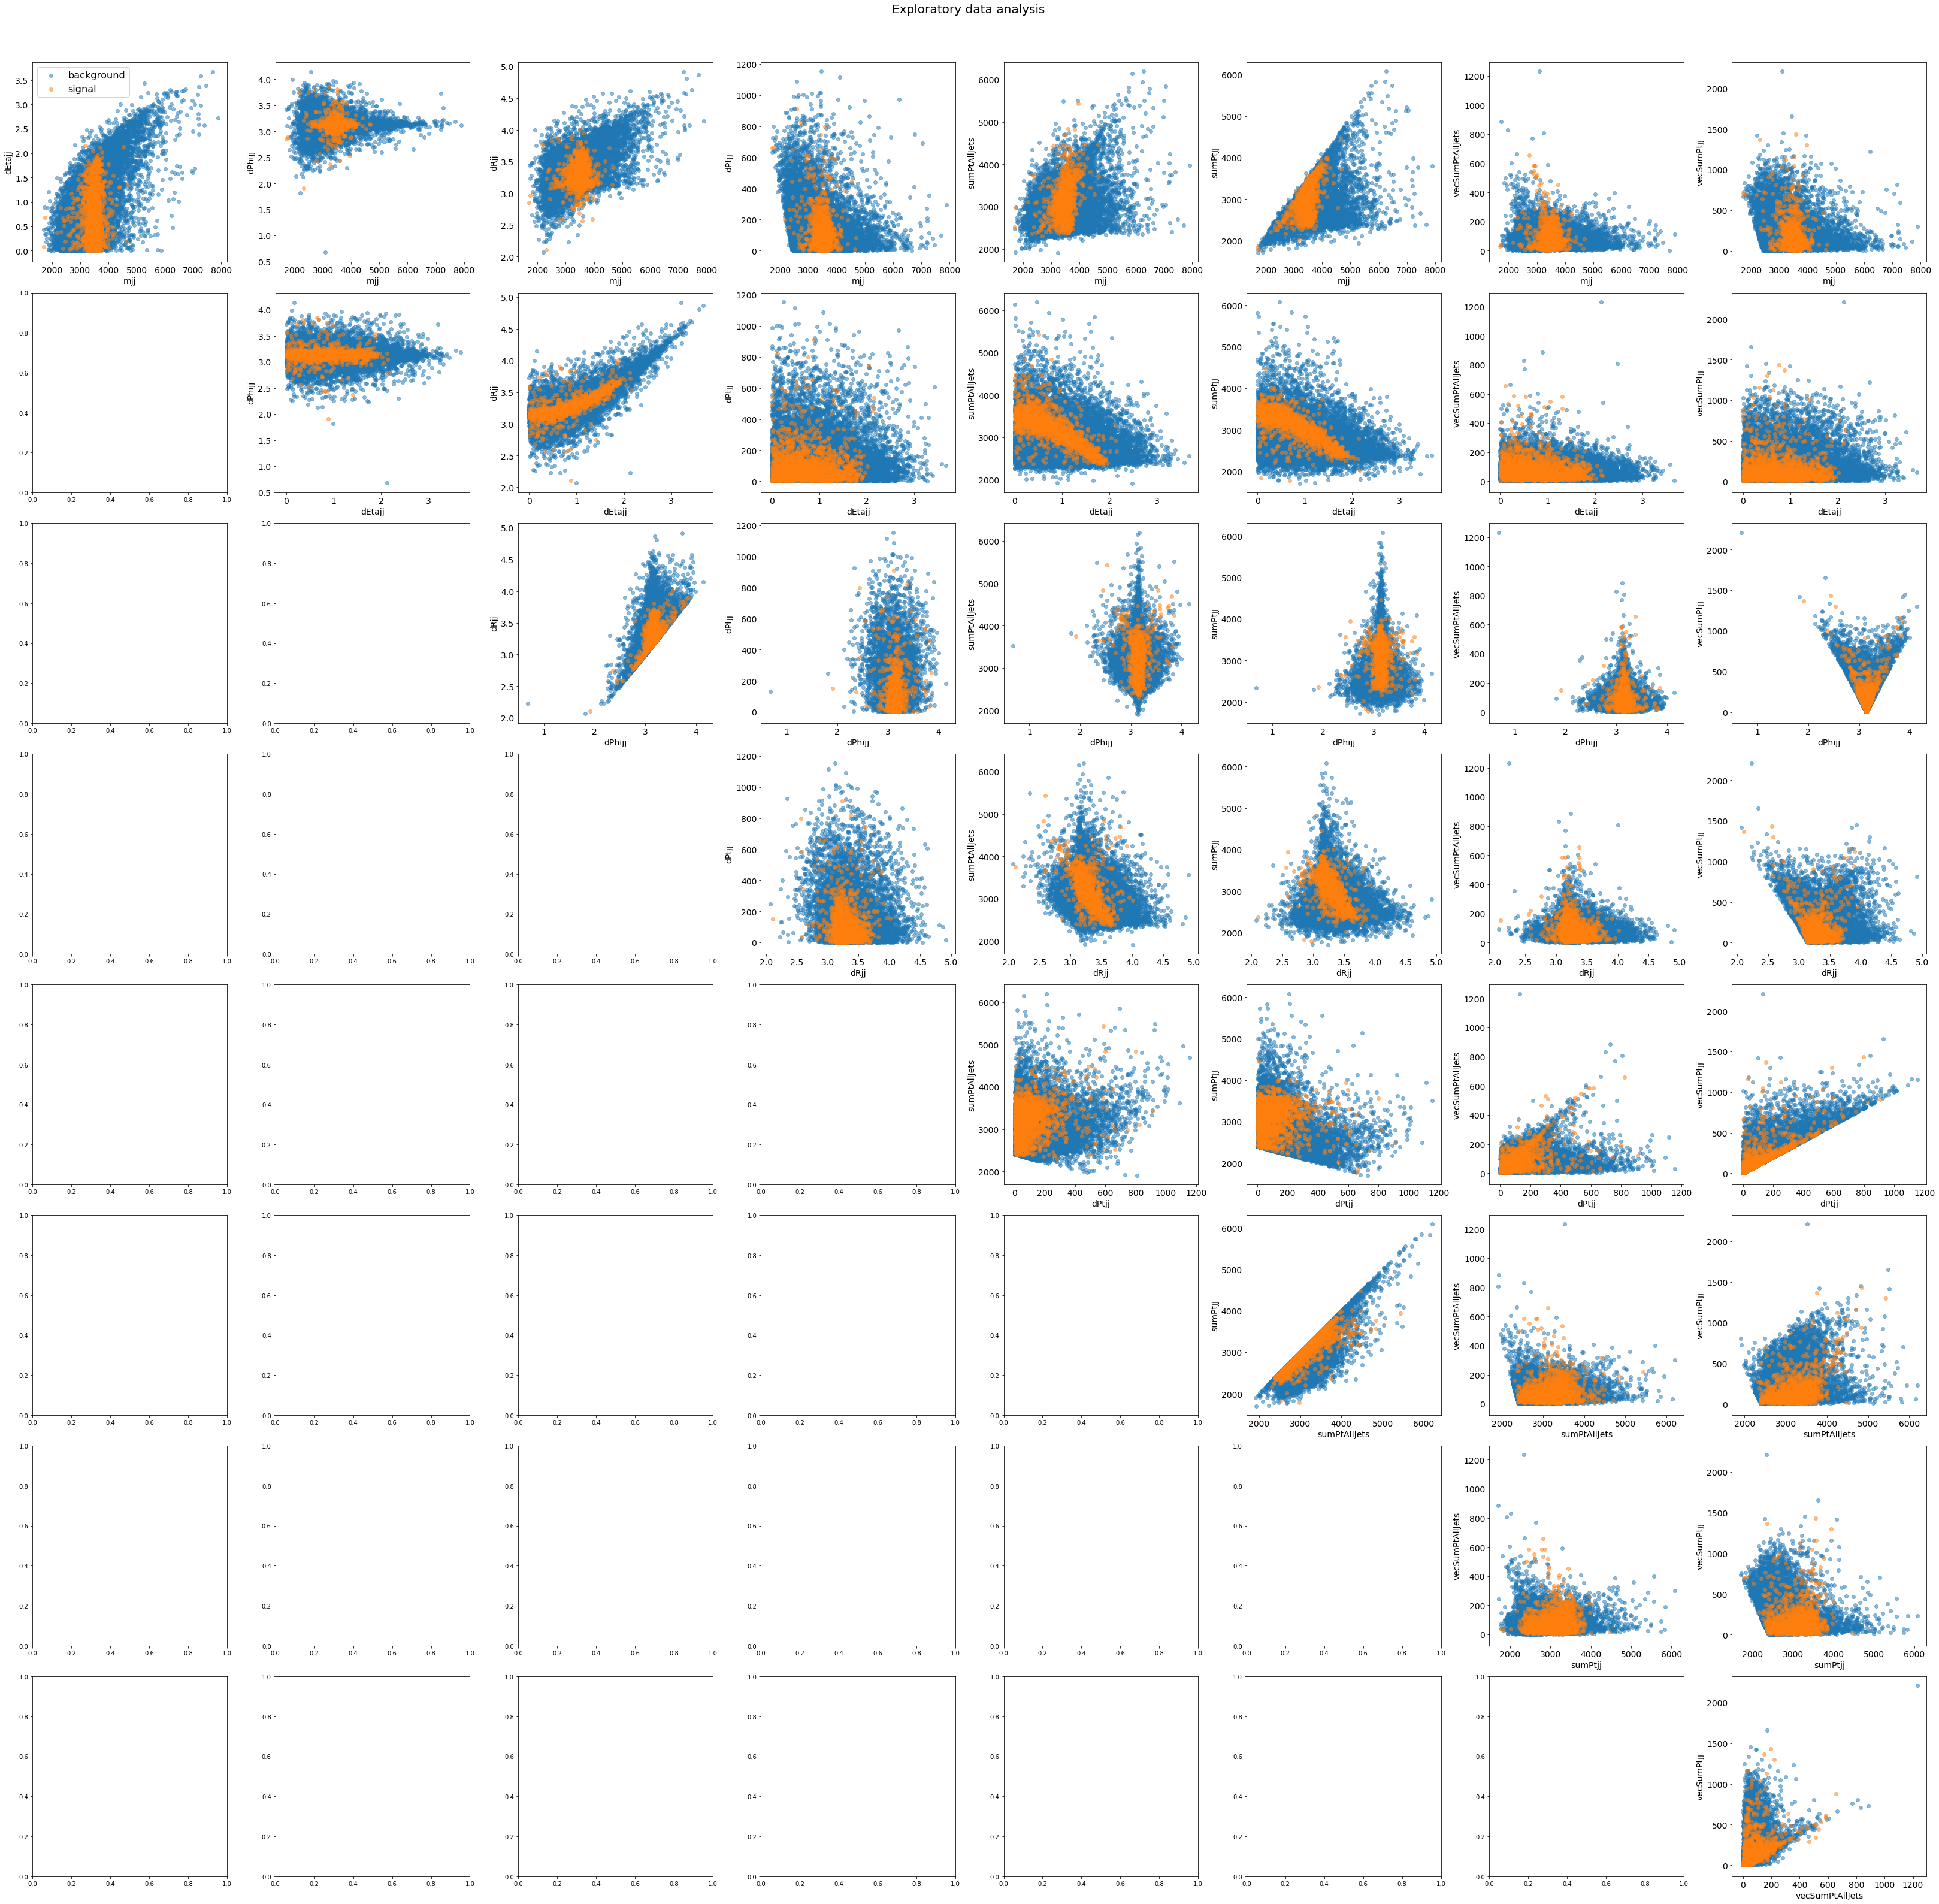

In [7]:
num_features = background_array.shape[1]

fig, ax = plt.subplots(num_features - 1, num_features - 1, figsize=(5*num_features, 5*num_features))

for param_1 in range(num_features):
    for param_2 in range(param_1 + 1, num_features):
            this_ax = ax[param_1, param_2- 1]
            this_ax.scatter(background_array[:, param_1], background_array[:, param_2], alpha=0.5, label='background')
            this_ax.scatter(signal_array[:, param_1], signal_array[:, param_2], alpha=0.5, label='signal')
            # Get the correct labels
            this_ax.set_xlabel(f"{df.columns[param_1+3]}", fontsize=14)
            this_ax.set_ylabel(f"{df.columns[param_2+3]}", fontsize=14)
            this_ax.xaxis.set_tick_params(labelsize=14)
            this_ax.yaxis.set_tick_params(labelsize=14)
            
fig.suptitle("Exploratory data analysis", fontsize=20)
ax[0, 0].legend(fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig("eda.png")